**VARIABLE DESCRIPTION**:
- **Customer_id**: Unique customer ID
- **Age**: Customer's age
- **Gender**: Customer's gender. 0 represents Female and 1 represents Male
- **Revenue_Total**: Total sales by the customer
- **N_Purchases**: Number of purchases made by the customer to date
- **Purchase_DATE**: Date of the customer's latest purchase in the format dd.mm.yy
- **Purchase_VALUE**: Value of the customer's latest purchase in euros (€)
- **Pay_Method**: Payment method used by the customer. 0 represents PayPal, 1 represents Credit Card, 2 represents Bank Transfer, 3 represents Cash on Delivery, and 4 represents Other.
- **Time_Spent**: Time spent by the customer on the website in seconds
- **Browser**: Browser used by the customer. 0 represents Google Chrome, 1 represents Mozilla Firefox, 2 represents Safari, 3 represents Microsoft Edge, and 4 represents Other.
- **Newsletter**: Indicates whether the customer is subscribed to the newsletter. 0 represents Not Subscribed and 1 represents Subscribed.
- **Voucher**: Indicates whether the customer has used a voucher. 0 represents Not Used and 1 represents Used.

**IMPORTING LIBRARIES**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats


%matplotlib inline
from IPython.display import Markdown
import warnings
warnings.filterwarnings("ignore")

**DATA** 

In [23]:
df = pd.read_csv('Online Shop Customer Sales Data.csv')
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_id,65796.0,537205.500000,18993.813493,504308.000,520756.75000,537205.50,553654.250,570103.0
Age,65796.0,39.592696,13.825466,16.000,28.00000,40.00,51.000,63.0
Gender,65796.0,0.671348,0.469727,0.000,0.00000,1.00,1.000,1.0
Revenue_Total,65796.0,27.732935,14.941878,0.500,15.30000,30.10,37.600,59.9
N_Purchases,65796.0,3.992477,2.004370,1.000,2.00000,4.00,6.000,7.0
Purchase_VALUE,65796.0,15.968699,13.229295,0.005,4.81975,12.64,24.752,59.9
Pay_Method,65796.0,1.308651,1.081959,0.000,0.00000,1.00,2.000,3.0
Time_Spent,65796.0,598.925603,277.833635,120.000,358.00000,598.00,840.000,1080.0
Browser,65796.0,0.630935,0.996407,0.000,0.00000,0.00,1.000,3.0
Newsletter,65796.0,0.151027,0.358078,0.000,0.00000,0.00,0.000,1.0


**HYPOTHESIS TESTING**

we would be performing an hypothesis testing on the data using one of the numerous statistical tests; One-sample t-test: 'stats.ttest_1samp()'. we prepare our data and extract the required sample and then perform the test by running the code below:  


In [25]:
# Specify the population mean
population_mean = 40

# Extract the age data from the DataFrame
age_data = df['Age']

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(age_data, population_mean)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


**Whether the average customer age differs considerably from a particular demographic mean is the hypothesis being tested in the provided code. The alternative hypothesis contends that the mean age is not equal to the population mean, contrary to the null hypothesis's assumption that it actually is. The one-sample t-test used by the algorithm to decide whether to reject or fail to reject the null hypothesis compares the obtained p-value to an alpha significance level.**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [27]:
df.isnull().sum()
#checking to see if our dataset contains null values 

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

**REPLACING VALUES**

In [28]:

#0 is for Female and 1 is for Male respectively; replacing the values 
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,Male,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,Female,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,Female,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,Male,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,Female,56.9,1,14.09.21,56.900,1,605,0,1,0


**REPLACING VALUES**

In [29]:
#0 represents PayPal, 1 represents Credit Card, 2 represents Bank Transfer, 3 represents Cash on Delivery, and 4 represents Other.; replacing the values 
df['Pay_Method'] = df['Pay_Method'].replace({0: 'PayPal', 1: 'Credit Card', 2: 'Bank Transfer', 3: 'Cash on Delivery', 4: 'Other'})
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,Male,45.3,2,22.06.21,24.915,Credit Card,885,0,0,0
1,504309,18,Female,36.2,3,10.12.21,2.896,Bank Transfer,656,0,0,1
2,504310,52,Female,10.6,1,14.03.21,10.600,PayPal,761,0,1,0
3,504311,29,Male,54.1,5,25.10.21,43.280,Credit Card,906,0,1,0
4,504312,21,Female,56.9,1,14.09.21,56.900,Credit Card,605,0,1,0


0 represents Google Chrome, 1 represents Mozilla Firefox, 2 represents Safari, 3 represents Microsoft Edge, and 4 represents Other


In [30]:
df['Browser'] = df['Browser'].replace({0: 'Google Chrome', 1: 'Mozilla Firefox', 2: 'Safari', 3: 'Microsoft Edge', 4: 'Other'})
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,Male,45.3,2,22.06.21,24.915,Credit Card,885,Google Chrome,0,0
1,504309,18,Female,36.2,3,10.12.21,2.896,Bank Transfer,656,Google Chrome,0,1
2,504310,52,Female,10.6,1,14.03.21,10.600,PayPal,761,Google Chrome,1,0
3,504311,29,Male,54.1,5,25.10.21,43.280,Credit Card,906,Google Chrome,1,0
4,504312,21,Female,56.9,1,14.09.21,56.900,Credit Card,605,Google Chrome,1,0


**ANALYSIS**

In [31]:
#Check if data cleaning is required for each column 

In [32]:
df['Customer_id'].unique()

array([504308, 504309, 504310, ..., 570101, 570102, 570103])

In [33]:
df['Age'].unique()

array([53, 18, 52, 29, 21, 55, 17, 30, 51, 63, 26, 42, 40, 19, 60, 22, 39,
       20, 54, 32, 36, 24, 57, 27, 41, 35, 48, 56, 49, 25, 50, 33, 34, 46,
       59, 45, 47, 62, 43, 61, 31, 44, 58, 23, 37, 38, 16, 28])

**VISUALIZATION**

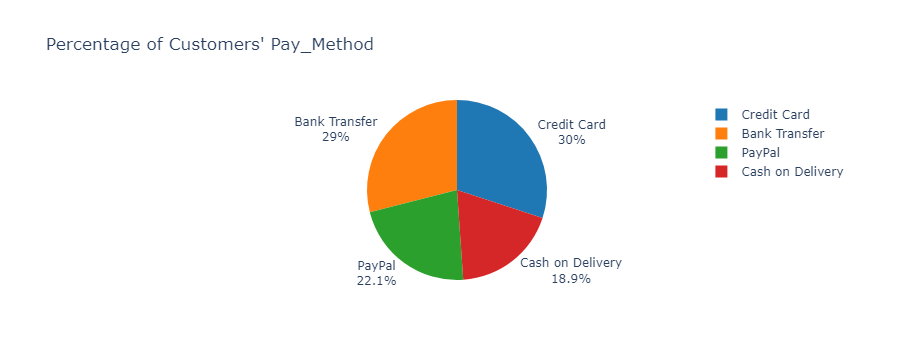

In [34]:
fig = px.pie(df, values=df['Pay_Method'].value_counts(), names=df['Pay_Method'].unique(), template='plotly_white', title="Percentage of Customers' Pay_Method")
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_traces(marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']))
fig.show()



<Figure size 1440x2016 with 0 Axes>

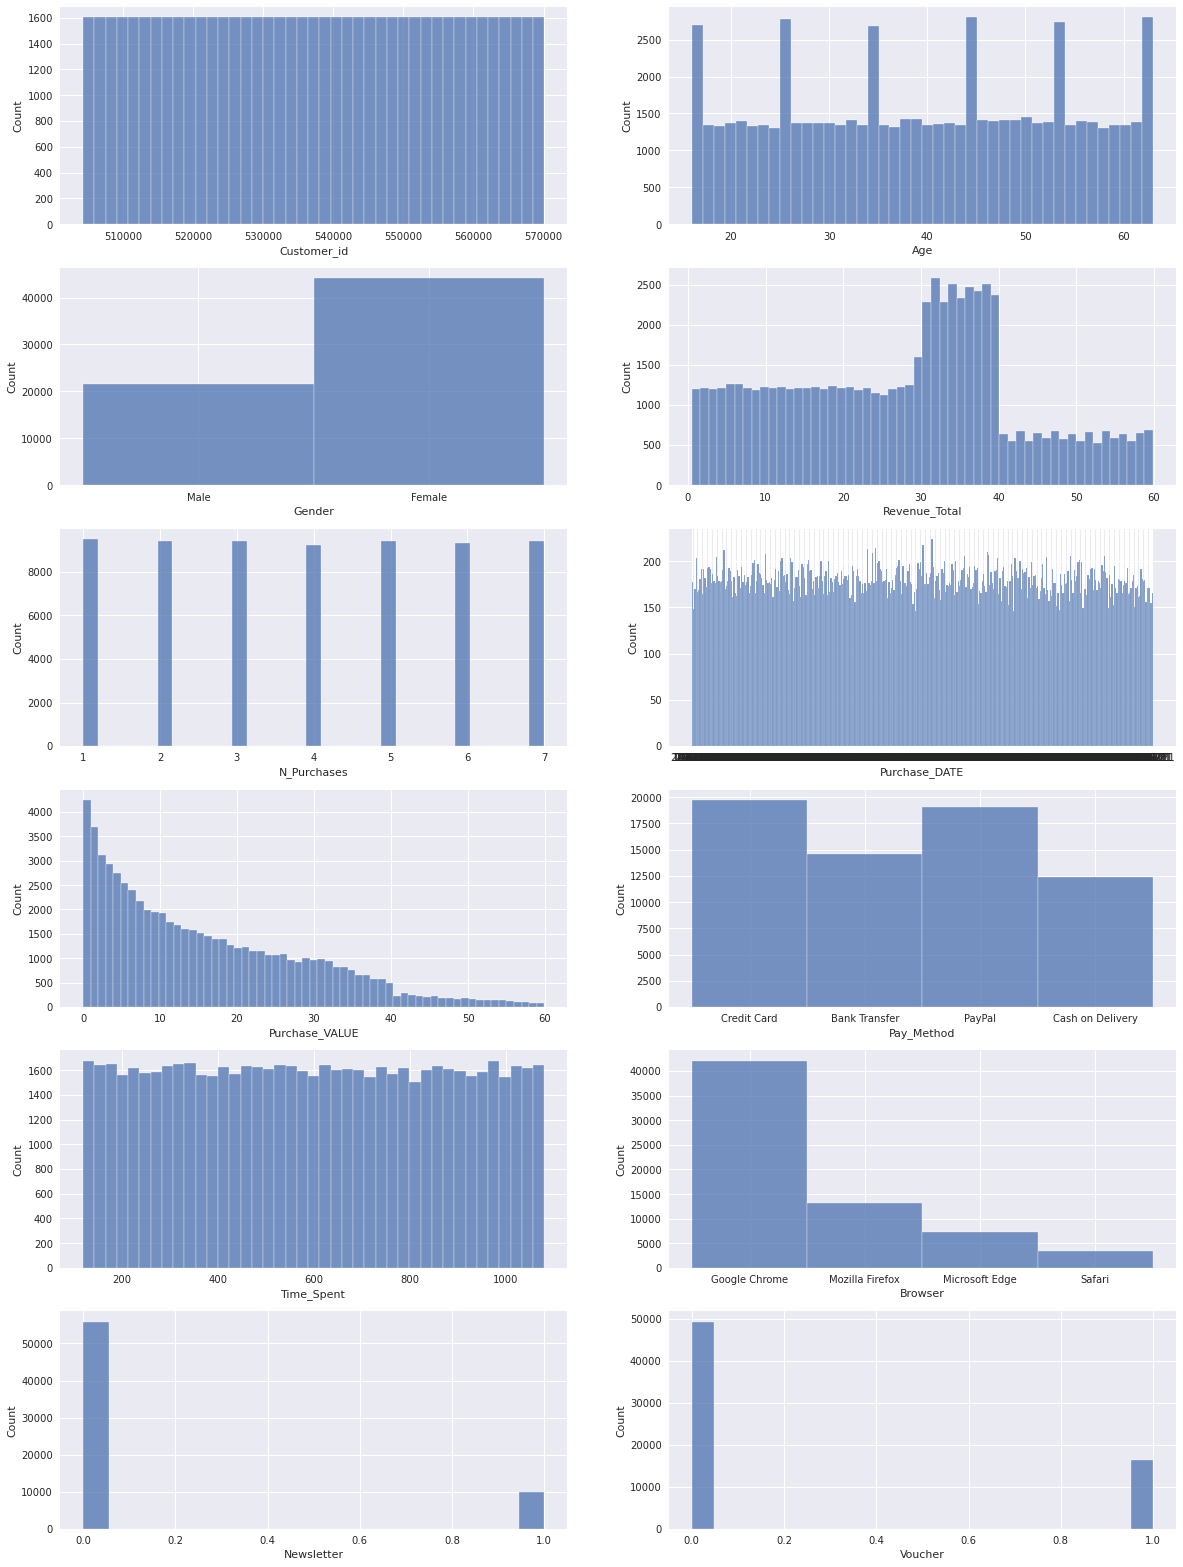

In [35]:
# background color and figure size
plt.style.use('seaborn')
plt.figure(figsize = (20, 28))
plt.subplots_adjust(hspace=0.5)
fig, axs = plt.subplots(6, 2, figsize=(20, 28))
custom_palette = "husl"


i = 1
# Looping through dataframe columns
for feature in df.columns:
    # Create a subplot
    plt.subplot(6, 2, i)
    # Create histogram
    sns.histplot(data = df, x = feature, palette=custom_palette)
    i += 1
    
# Show the plot
plt.show()

**Gender Distribution**

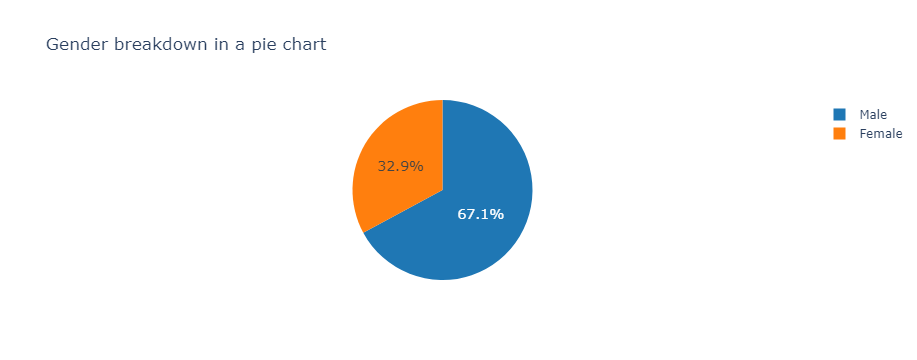

In [36]:
fig = px.pie(df, values=df['Gender'].value_counts(), names=df['Gender'].unique(), template='plotly_white', title="Gender breakdown in a pie chart")
fig.update_traces(textposition='inside', textfont_size=14)
fig.update_traces(marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']))
fig.show()




**REVENUE BY GENDER**

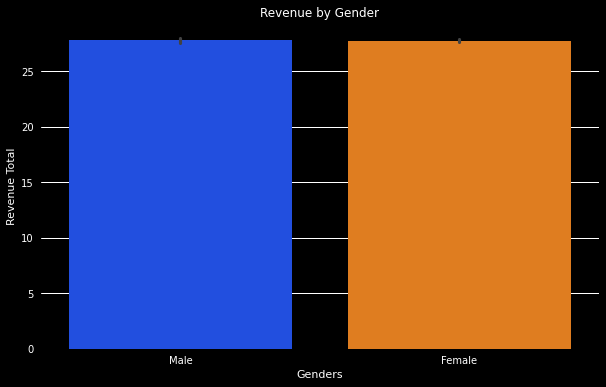

In [37]:
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Barplot
sns.barplot(x = 'Gender', y = 'Revenue_Total', data = df, palette = 'bright')

# Labels
plt.xlabel('Genders')
plt.ylabel('Revenue Total')
plt.title('Revenue by Gender')

plt.show()

**BROWSER DISTRIBUTION**

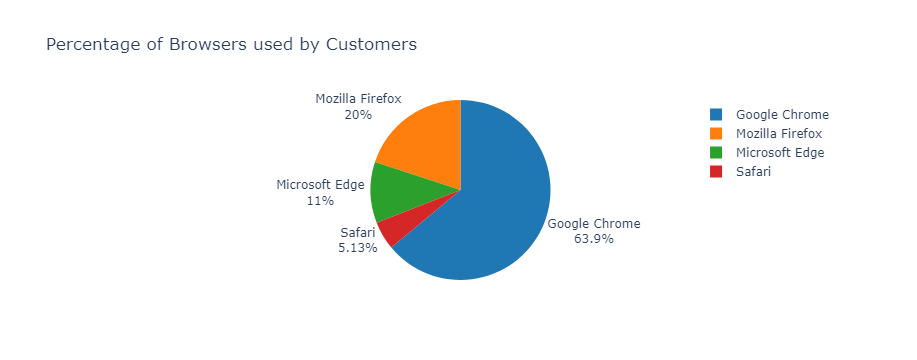

In [38]:
fig = px.pie(df, values=df['Browser'].value_counts(), names=df['Browser'].unique(), template='plotly_white', title="Percentage of Browsers used by Customers")
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_traces(marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']))
fig.show()

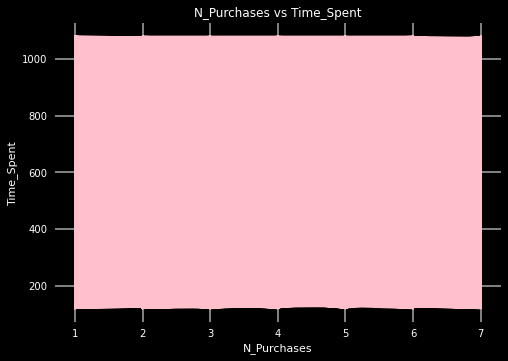

In [39]:
# Create the line plot
plt.plot(df['N_Purchases'], df['Time_Spent'], color='pink')

# Display grid lines
plt.grid(color='gray', linestyle='-', linewidth= 2)

# Set the axis labels
plt.xlabel('N_Purchases')
plt.ylabel('Time_Spent')

# Set the title
plt.title('N_Purchases vs Time_Spent')

# Show the plot
plt.show()

In [40]:
df = pd.read_csv('Online Shop Customer Sales Data.csv')
df.tail()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0
65795,570103,25,0,5.3,2,23.10.21,2.968,0,820,0,0,0


**INSIGHTS**
- We have 65796 customers in this data set ranging from 0-65795
-  67.1% of these customers are men  and 32.9% are women
- The minimum aged person is 16 Years of age 
- The highest pay method for purchases is Credit cards
- The lowest Pay method is Cash on Delivery
- Chrome browser has the highest usage rate 
- The average purchase price is 15.96
- The standard deviation is 13.22
- The maximum customer ID is 570103.0
- The revenue total for both male and female are equal